# Capstone Project - Final Report

### Title:    Tourism Recommender System

## Introduction/Business Problem

The Idea of the project is to recommend cities to some user to visit, based on previous cities he visited before. 
 
Recommender Systems are data science tools, which attempt to predict items out of large pool a user may highly likely be interested in, and to suggest him the best one. They also support systems helping users to find and/ or to make choices about items that matches their preferences and interests.

In the tourism field, recommender systems aim to match the characteristics of tourism and leisure resources or attractions with the user needs.

By Defining cities characteristics and using user preferences, the recommender system can suggest some new cities for this user, cities that are similar to his needs.

The audience of the project are tourists. That is, by helping them choosing cities they like to visit.

## Data

There is to types of data sources will be used in this project.

The first one is Foursquare Location Data.  
The second one is Postal Codes with the names of neighbourhoods of the major cities in the world.

### Foursquare Location Data

Foursquare is a technology company that built a massive dataset of location data. What is interesting about Foursquare is that they were very smart about building their dataset. They actually crowd-sourced their data and had people use their app to build their dataset and add venues and complete any missing information they had in their dataset. Currently its location data is the most comprehensive out there, and quite accurate that it powers location data for many popular services like Apple Maps, Uber, Snapchat, Twitter and many others, and is currently being used by over 100,000 developers, and this number is only growing. 


### Postal Codes Data

The Postal Codes Data for most of countries is available at AggData Website (https://www.aggdata.com).
I will download the data of three countries: United States, France and Italy. And then, I will get the major cities for each country.

The Postal Codes from AggData are able to be downloaded as csv files. The data contains also the location of the neighbourhoods which makes it very useful to use it along side with Forusquare API

### Aquiring Data
I already downloaded the data of AggData website from this web-pages:  
France Postal Codes: https://www.aggdata.com/free/france-postal-codes  
Italy Postal Codes: https://www.aggdata.com/free/italy-postal-codes  
United Stated Postal Codes: https://www.aggdata.com/free/united-states-zip-codes

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import requests # library to handle requests
import random

%matplotlib inline

In [2]:
france = pd.read_csv("Data/france.csv", encoding='latin-1')

In [3]:
france.head()

,Postal Code,Place Name,State,County,City,Latitude,Longitude
0,24000,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
1,24001 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
2,24002 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
3,24003 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
4,24004 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167


In [4]:
france.shape

(51130, 7)

In [5]:
# The major cities in France
france_major_cities = ['Paris',
 'Arrondissement de Lyon',
 'Arrondissement de Lille',
 'Arrondissement de Nanterre',
 'Arrondissement de Marseille']

france_major_cities_df = france[france["City"].isin(france_major_cities) ]

In [6]:
france_major_cities_df.shape

(2377, 7)

In [7]:
italy = pd.read_csv("Data/italy.csv")
italy.head()

,Postal Code,Place Name,State,State Abbreviation,County,Latitude,Longitude
0,67100.0,L'Aquila,Abruzzi,AB,L'Aquila,42.3507,13.3999
1,66100.0,Tricalle,Abruzzi,AB,Chieti,42.3549,14.1693
2,65100.0,Pescara,Abruzzi,AB,Pescara,42.4667,14.2167
3,65121.0,Pescara,Abruzzi,AB,Pescara,42.4667,14.2167
4,65122.0,Pescara,Abruzzi,AB,Pescara,42.4667,14.2167


In [8]:
italy.shape

(19941, 7)

In [9]:
# The major cities in Italy
italy_major_cities = ['Roma', 'Torino', 'Messina', 'Milano', 'Salerno']

italy_major_cities_df = italy[italy["County"].isin(italy_major_cities)]

In [10]:
italy_major_cities_df.shape

(538, 7)

In [11]:
usa = pd.read_csv("Data/us.csv")
usa.head()

,Zip Code,Place Name,State,State Abbreviation,County,Latitude,Longitude
0,501,Holtsville,New York,NY,Suffolk,40.8154,-73.0451
1,544,Holtsville,New York,NY,Suffolk,40.8154,-73.0451
2,1001,Agawam,Massachusetts,MA,Hampden,42.0702,-72.6227
3,1002,Amherst,Massachusetts,MA,Hampshire,42.3671,-72.4646
4,1003,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248


In [12]:
usa.head()

,Zip Code,Place Name,State,State Abbreviation,County,Latitude,Longitude
0,501,Holtsville,New York,NY,Suffolk,40.8154,-73.0451
1,544,Holtsville,New York,NY,Suffolk,40.8154,-73.0451
2,1001,Agawam,Massachusetts,MA,Hampden,42.0702,-72.6227
3,1002,Amherst,Massachusetts,MA,Hampshire,42.3671,-72.4646
4,1003,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248


In [13]:
usa_major_cities = ["New York", "Los Angeles", "Houston", "San Diego", "Philadelphia"]
usa_major_cities_df = usa[usa["County"].isin(usa_major_cities)]

In [14]:
usa_major_cities_df.shape

(959, 7)

## Methodology

The main purpose of the project is to recommend a place to visit for some user based on his previous experiernce, especially, which cities and places he visited before.  

First of all, we will **clean** and **merge** the **postal code** data that is discussed in **Data** section.  
Then, using **Foursquare API**, we will get the venues on each neighborhood.  
We will do some **EDA and Preprocessing** on the data to clean data from any noisy data that can affect negatively on the results.  
After that, an anlysis of each neighborhood is required to determine which **venue categories** this neighborhood serve.  
We will use **Recommender Systems** to recommend the new place to the user. The type of Recommender System used is **Content-based Recommendation Systems**.  

In order to use **Content-based Recommendation Systems**, we will create **genre_df** which provide info about the categories that are served in each neighborhood.  

In **Results** section, We will create some random user input to test our Recommender System.  

### Merge and Cleaning Data

Check dataframes types and do required actions on **types** of columns

In [15]:
france_major_cities_df.dtypes

Postal Code     object
Place Name      object
State           object
County          object
City            object
Latitude       float64
Longitude      float64
dtype: object

In [16]:
italy_major_cities_df.dtypes

Postal Code           float64
Place Name             object
State                  object
State Abbreviation     object
County                 object
Latitude              float64
Longitude             float64
dtype: object

In [17]:
usa_major_cities_df.dtypes

Zip Code                int64
Place Name             object
State                  object
State Abbreviation     object
County                 object
Latitude              float64
Longitude             float64
dtype: object

Convert postal code type in **italy_major_cities_df** from **float64 -> object**  
(Convert first to **int** to remove .0 from each value, then convert the resulted column to **object**)

In [18]:
italy_major_cities_df["Postal Code"] = italy_major_cities_df["Postal Code"].astype(int).astype(str)

c:\users\mohanad\appdata\local\conda\conda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Check types again

In [19]:
italy_major_cities_df.dtypes

Postal Code            object
Place Name             object
State                  object
State Abbreviation     object
County                 object
Latitude              float64
Longitude             float64
dtype: object

Convert **zip code** type in **usa_major_cities_df** from **int64 -> object**

In [39]:
usa_major_cities_df["Zip Code"] = usa_major_cities_df["Zip Code"].astype("str")

c:\users\mohanad\appdata\local\conda\conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Zip Code               object
Place Name             object
State                  object
State Abbreviation     object
County                 object
Latitude              float64
Longitude             float64
dtype: object

Check types again

In [20]:
usa_major_cities_df.dtypes

Zip Code                int64
Place Name             object
State                  object
State Abbreviation     object
County                 object
Latitude              float64
Longitude             float64
dtype: object

Postal Codes is name in USA as Zip codes. Due to analysis issues, I will change "Zip Code" column name to "Postal Code"

In [21]:
usa_major_cities_df.rename(columns= {"Zip Code": "Postal Code"}, inplace=True)

usa_major_cities_df.head()

c:\users\mohanad\appdata\local\conda\conda\envs\py37\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Postal Code,Place Name,State,State Abbreviation,County,Latitude,Longitude
3003,10001,New York,New York,NY,New York,40.7484,-73.9967
3004,10002,New York,New York,NY,New York,40.7152,-73.9877
3005,10003,New York,New York,NY,New York,40.7313,-73.9892
3006,10004,New York,New York,NY,New York,40.6964,-74.0253
3007,10005,New York,New York,NY,New York,40.7056,-74.0083


Rename **County** column to **City** becuase it is more familiar for italy and usa. For France, we already use cities instead of county

In [22]:
usa_major_cities_df.rename(columns= {"County": "City"}, inplace=True)
italy_major_cities_df.rename(columns= {"County": "City"}, inplace=True)

In [23]:
usa_major_cities_df.head()

,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude
3003,10001,New York,New York,NY,New York,40.7484,-73.9967
3004,10002,New York,New York,NY,New York,40.7152,-73.9877
3005,10003,New York,New York,NY,New York,40.7313,-73.9892
3006,10004,New York,New York,NY,New York,40.6964,-74.0253
3007,10005,New York,New York,NY,New York,40.7056,-74.0083


In [24]:
italy_major_cities_df.head()

,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude
63,84100,Salerno,Campania,CM,Salerno,40.6833,14.7833
64,84121,Salerno,Campania,CM,Salerno,40.6780,14.7659
65,84122,Salerno,Campania,CM,Salerno,40.6833,14.7833
66,84123,Salerno,Campania,CM,Salerno,40.6833,14.7833
67,84124,Salerno,Campania,CM,Salerno,40.6833,14.7833


Remove **County** column from **france_major_cites_df**

In [25]:
france_major_cities_df.drop(["County"], axis=1, inplace=True)
france_major_cities_df.head()

c:\users\mohanad\appdata\local\conda\conda\envs\py37\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Postal Code,Place Name,State,City,Latitude,Longitude
5693,75001,Paris 01 Louvre,Île-de-France,Paris,48.8592,2.3417
5694,75002,Paris 02 Bourse,Île-de-France,Paris,48.8655,2.3426
5695,75003,Paris 03 Temple,Île-de-France,Paris,48.8637,2.3615
5696,75004,Paris 04 Hôtel-de-Ville,Île-de-France,Paris,48.8601,2.3507
5697,75005,Paris 05 Panthéon,Île-de-France,Paris,48.8448,2.3471


### Merge the three dataframes into one df
At first, set Postal Code as index before merge.

In [26]:
 france_major_cities_df.set_index("Postal Code", inplace=True)
italy_major_cities_df.set_index("Postal Code", inplace=True)
usa_major_cities_df.set_index("Postal Code", inplace=True)


In [27]:
frames = [france_major_cities_df, italy_major_cities_df, usa_major_cities_df]
df = pd.concat(frames)

c:\users\mohanad\appdata\local\conda\conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [28]:
df.shape

(3874, 6)

#### Do some cleaning and column renaming on the new dataframe

In [29]:
# reset Index
df.reset_index(inplace=True)

In [30]:
df.head()

,Postal Code,City,Latitude,Longitude,Place Name,State,State Abbreviation
0,75001,Paris,48.8592,2.3417,Paris 01 Louvre,Île-de-France,NaN
1,75002,Paris,48.8655,2.3426,Paris 02 Bourse,Île-de-France,NaN
2,75003,Paris,48.8637,2.3615,Paris 03 Temple,Île-de-France,NaN
3,75004,Paris,48.8601,2.3507,Paris 04 Hôtel-de-Ville,Île-de-France,NaN
4,75005,Paris,48.8448,2.3471,Paris 05 Panthéon,Île-de-France,NaN


In [31]:
# remove "State", "State Abbreviation" Columns
df.drop(["State", "State Abbreviation"], axis=1, inplace=True)

In [32]:
df.head()

,Postal Code,City,Latitude,Longitude,Place Name
0,75001,Paris,48.8592,2.3417,Paris 01 Louvre
1,75002,Paris,48.8655,2.3426,Paris 02 Bourse
2,75003,Paris,48.8637,2.3615,Paris 03 Temple
3,75004,Paris,48.8601,2.3507,Paris 04 Hôtel-de-Ville
4,75005,Paris,48.8448,2.3471,Paris 05 Panthéon


In [33]:
df.City.unique()

array(['Paris', 'Arrondissement de Nanterre', 'Arrondissement de Lille',
       'Arrondissement de Marseille', 'Arrondissement de Lyon', 'Salerno',
       'Milano', 'Roma', 'Torino', 'Messina', 'New York', 'Philadelphia',
       'Houston', 'Los Angeles', 'San Diego'], dtype=object)

Rename french cities that start with "Arrondissment de"

In [34]:
df["City"] = df["City"].apply(lambda x : x.replace("Arrondissement de ", "") )
df.City.unique()

array(['Paris', 'Nanterre', 'Lille', 'Marseille', 'Lyon', 'Salerno',
       'Milano', 'Roma', 'Torino', 'Messina', 'New York', 'Philadelphia',
       'Houston', 'Los Angeles', 'San Diego'], dtype=object)

Rename **Place Name** column to **Neighborhood**

In [35]:
df.rename(columns = {"Place Name": "Neighborhood"}, inplace=True)

In [36]:
df.head()

,Postal Code,City,Latitude,Longitude,Neighborhood
0,75001,Paris,48.8592,2.3417,Paris 01 Louvre
1,75002,Paris,48.8655,2.3426,Paris 02 Bourse
2,75003,Paris,48.8637,2.3615,Paris 03 Temple
3,75004,Paris,48.8601,2.3507,Paris 04 Hôtel-de-Ville
4,75005,Paris,48.8448,2.3471,Paris 05 Panthéon


Add Postal Code to the name of the neighborhood to avoid repeated values in Neighborhood column

In [37]:
df["Neighborhood"] = df.apply(lambda x: "{} - {}".format(x[4],  x[0]), axis=1)

### EDA

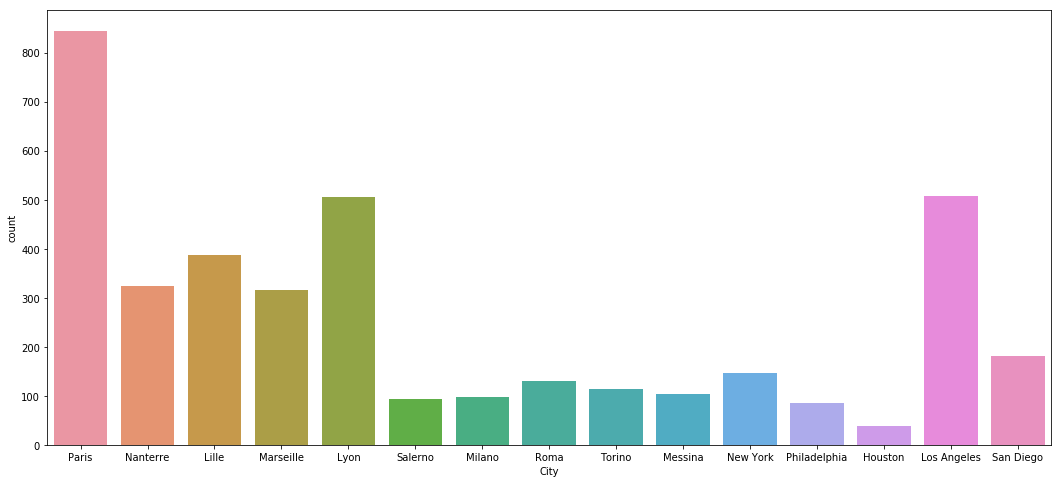

In [39]:
plt.figure(figsize=(18,8))
sns.countplot(df.City)

We See that Paris city has the most count of Places in our dataset, while Houston city has the minimum number of places with arround 50 places (postal codes)

### Visualize Data in Map

We will just visualize data for two cities Roma and San Diego.

#### Roma

In [40]:
roma_df = df[df["City"] == "Roma"]
map_roma = folium.Map(location=[41.9028, 12.4964], zoom_start=9)

# add markers to map
for lat, lng, neighborhood in zip(roma_df['Latitude'], roma_df['Longitude'], roma_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_roma)  
    
map_roma

#### San Diego

In [41]:
san_diego_df = df[df["City"] == "San Diego"]
map_san_diego = folium.Map(location=[32.71533, -117.15726], zoom_start=9)

# add markers to map
for lat, lng, neighborhood in zip(san_diego_df['Latitude'], san_diego_df['Longitude'], san_diego_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_san_diego)  
    
map_san_diego

## Foursquare
#### Define Foursquare Credentials and Version

In [43]:
CLIENT_ID = '###' # your Foursquare ID
CLIENT_SECRET = '###' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ###
CLIENT_SECRET:###


### Explore Neighborhoods
explore Neighborhoods using **Foursquare** by fetching all venues in each neighborhood.

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    i = 0
    count = names.shape[0]
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        print("{0:.2f} %".format((i / count) * 100))
        i += 1
        try:
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            print("Error Occurred")

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [186]:
venues_df = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )




Paris 01 Louvre - 75001
0.00 %
Paris 02 Bourse - 75002
0.03 %
Paris 03 Temple - 75003
0.05 %
Paris 04 Hôtel-de-Ville - 75004
0.08 %
Paris 05 Panthéon - 75005
0.10 %
Paris 06 Luxembourg - 75006
0.13 %
Paris 07 Palais-Bourbon - 75007
0.15 %
Paris 08 Élysée - 75008
0.18 %
Paris 09 Opéra - 75009
0.21 %
Paris 10 Entrepôt - 75010
0.23 %
Paris 11 Popincourt - 75011
0.26 %
Paris 12 Reuilly - 75012
0.28 %
Paris 13 Gobelins - 75013
0.31 %
Paris 14 Observatoire - 75014
0.34 %
Paris 15 Vaugirard - 75015
0.36 %
Paris 16 Passy - 75016
0.39 %
Paris 17 Batignolles-Monceau - 75017
0.41 %
Paris 18 Buttes-Montmartre - 75018
0.44 %
Paris 19 Buttes-Chaumont - 75019
0.46 %
Paris 20 Ménilmontant - 75020
0.49 %
Paris 01 Louvre - 75021 CEDEX 01
0.52 %
Paris 01 Louvre - 75023 CEDEX 01
0.54 %
Paris 01 Louvre - 75024 CEDEX 01
0.57 %
Paris 01 Louvre - 75026 CEDEX 01
0.59 %
Paris 01 Louvre - 75028 CEDEX 01
0.62 %
Paris 01 Louvre - 75029 CEDEX 01
0.65 %
Paris 01 Louvre - 75030 CEDEX 01
0.67 %
Paris 01 Louvre - 75031

Paris 05 Panthéon - 75236 CEDEX 05
5.14 %
Paris 05 Panthéon - 75237 CEDEX 05
5.16 %
Paris 05 Panthéon - 75238 CEDEX 05
5.19 %
Paris 05 Panthéon - 75239 CEDEX 05
5.21 %
Paris 05 Panthéon - 75240 CEDEX 05
5.24 %
Paris 05 Panthéon - 75241 CEDEX 05
5.27 %
Paris 13 Gobelins - 75243 CEDEX 13
5.29 %
Paris 13 Gobelins - 75244 CEDEX 13
5.32 %
Paris 05 Panthéon - 75248 CEDEX 05
5.34 %
Paris 05 Panthéon - 75250 CEDEX 05
5.37 %
Paris 05 Panthéon - 75252 CEDEX 05
5.39 %
Paris 05 Panthéon - 75253 CEDEX 05
5.42 %
Paris 05 Panthéon - 75256 CEDEX 05
5.45 %
Paris 06 Luxembourg - 75260 CEDEX 06
5.47 %
Paris 06 Luxembourg - 75261 CEDEX 06
5.50 %
Paris 06 Luxembourg - 75262 CEDEX 06
5.52 %
Paris 06 Luxembourg - 75263 CEDEX 06
5.55 %
Paris 06 Luxembourg - 75264 CEDEX 06
5.58 %
Paris 06 Luxembourg - 75265 CEDEX 06
5.60 %
Paris 06 Luxembourg - 75266 CEDEX 06
5.63 %
Paris 06 Luxembourg - 75269 CEDEX 06
5.65 %
Paris 06 Luxembourg - 75270 CEDEX 06
5.68 %
Paris 06 Luxembourg - 75272 CEDEX 06
5.70 %
Paris 06 Luxem

Paris 10 Entrepôt - 75480 CEDEX 10
10.22 %
Paris 10 Entrepôt - 75481 CEDEX 10
10.25 %
Paris 10 Entrepôt - 75482 CEDEX 10
10.27 %
Paris 10 Entrepôt - 75483 CEDEX 10
10.30 %
Paris 10 Entrepôt - 75484 CEDEX 10
10.33 %
Paris 10 Entrepôt - 75485 CEDEX 10
10.35 %
Paris 10 Entrepôt - 75486 CEDEX 10
10.38 %
Paris 10 Entrepôt - 75487 CEDEX 10
10.40 %
Paris 10 Entrepôt - 75488 CEDEX 10
10.43 %
Paris 10 Entrepôt - 75490 CEDEX 10
10.45 %
Paris 10 Entrepôt - 75491 CEDEX 10
10.48 %
Paris 10 Entrepôt - 75492 CEDEX 10
10.51 %
Paris 10 Entrepôt - 75493 CEDEX 10
10.53 %
Paris 10 Entrepôt - 75495 CEDEX 10
10.56 %
Paris 10 Entrepôt - 75496 CEDEX 10
10.58 %
Paris 10 Entrepôt - 75497 CEDEX 10
10.61 %
Paris 10 Entrepôt - 75498 CEDEX 10
10.64 %
Paris 10 Entrepôt - 75499 CEDEX 10
10.66 %
Paris 15 Vaugirard - 75502 CEDEX 15
10.69 %
Paris 15 Vaugirard - 75503 CEDEX 15
10.71 %
Paris 15 Vaugirard - 75504 CEDEX 15
10.74 %
Paris 15 Vaugirard - 75505 CEDEX 15
10.76 %
Paris 15 Vaugirard - 75506 CEDEX 15
10.79 %
Paris 

Paris 14 Observatoire - 75694 CEDEX 14
15.05 %
Paris 14 Observatoire - 75696 CEDEX 14
15.07 %
Paris 14 Observatoire - 75697 CEDEX 14
15.10 %
Paris 14 Observatoire - 75698 CEDEX 14
15.13 %
Paris 14 Observatoire - 75699 CEDEX 14
15.15 %
Paris 07 Palais-Bourbon - 75700 SP 07
15.18 %
Paris 13 Gobelins - 75701 CEDEX 13
15.20 %
Paris 13 Gobelins - 75702 CEDEX 13
15.23 %
Paris 13 Gobelins - 75703 CEDEX 13
15.26 %
Paris 13 Gobelins - 75705 CEDEX 13
15.28 %
Paris 13 Gobelins - 75706 CEDEX 13
15.31 %
Paris 13 Gobelins - 75707 CEDEX 13
15.33 %
Paris 13 Gobelins - 75708 CEDEX 13
15.36 %
Paris 13 Gobelins - 75709 CEDEX 13
15.38 %
Paris 15 Vaugirard - 75710 CEDEX 15
15.41 %
Paris 15 Vaugirard - 75712 CEDEX 15
15.44 %
Paris 15 Vaugirard - 75713 CEDEX 15
15.46 %
Paris 15 Vaugirard - 75714 CEDEX 15
15.49 %
Paris 08 Élysée - 75715 CEDEX 08
15.51 %
Paris 15 Vaugirard - 75716 CEDEX 15
15.54 %
Paris 15 Vaugirard - 75717 CEDEX 15
15.57 %
Paris 15 Vaugirard - 75718 CEDEX 15
15.59 %
Paris 15 Vaugirard - 75719

Paris 15 Vaugirard - 75901 CEDEX 15
19.49 %
Paris 15 Vaugirard - 75902 CEDEX 15
19.51 %
Paris 15 Vaugirard - 75903 CEDEX 15
19.54 %
Paris 15 Vaugirard - 75904 CEDEX 15
19.57 %
Paris 15 Vaugirard - 75905 CEDEX 15
19.59 %
Paris 15 Vaugirard - 75907 CEDEX 15
19.62 %
Paris 15 Vaugirard - 75908 CEDEX 15
19.64 %
Paris 15 Vaugirard - 75909 CEDEX 15
19.67 %
Paris 15 Vaugirard - 75911 CEDEX 15
19.70 %
Paris 19 Buttes-Chaumont - 75913 CEDEX 19
19.72 %
Paris 13 Gobelins - 75914 CEDEX 13
19.75 %
Paris 04 Hôtel-de-Ville - 75915 CEDEX 04
19.77 %
Paris 19 Buttes-Chaumont - 75916 CEDEX 19
19.80 %
Paris 19 Buttes-Chaumont - 75917 CEDEX 19
19.82 %
Paris 19 Buttes-Chaumont - 75918 CEDEX 19
19.85 %
Paris 19 Buttes-Chaumont - 75919 CEDEX 19
19.88 %
Paris 19 Buttes-Chaumont - 75920 CEDEX 19
19.90 %
Paris 19 Buttes-Chaumont - 75921 CEDEX 19
19.93 %
Paris 19 Buttes-Chaumont - 75922 CEDEX 19
19.95 %
Paris 19 Buttes-Chaumont - 75923 CEDEX 19
19.98 %
Paris 19 Buttes-Chaumont - 75924 CEDEX 19
20.01 %
Paris 19 But

Villeneuve-la-Garenne - 92399 CEDEX
24.70 %
Courbevoie - 92400
24.73 %
Courbevoie - 92401 CEDEX
24.75 %
Courbevoie - 92402 CEDEX
24.78 %
Courbevoie - 92403 CEDEX
24.81 %
Courbevoie - 92404 CEDEX
24.83 %
Courbevoie - 92405 CEDEX
24.86 %
Courbevoie - 92406 CEDEX
24.88 %
Courbevoie - 92407 CEDEX
24.91 %
Courbevoie - 92408 CEDEX
24.94 %
Courbevoie - 92409 CEDEX
24.96 %
Courbevoie - 92411 CEDEX
24.99 %
Courbevoie - 92412 CEDEX
25.01 %
Courbevoie - 92413 CEDEX
25.04 %
Courbevoie - 92414 CEDEX
25.06 %
Courbevoie - 92415 CEDEX
25.09 %
Courbevoie - 92416 CEDEX
25.12 %
Courbevoie - 92417 CEDEX
25.14 %
Courbevoie - 92418 CEDEX
25.17 %
Courbevoie - 92419 CEDEX
25.19 %
Rueil-Malmaison - 92500
25.22 %
Rueil-Malmaison - 92501 CEDEX
25.25 %
Rueil-Malmaison - 92502 CEDEX
25.27 %
Rueil-Malmaison - 92503 CEDEX
25.30 %
Rueil-Malmaison - 92504 CEDEX
25.32 %
Rueil-Malmaison - 92505 CEDEX
25.35 %
Rueil-Malmaison - 92506 CEDEX
25.37 %
Rueil-Malmaison - 92507 CEDEX
25.40 %
Rueil-Malmaison - 92508 CEDEX
25.43 %

Lille - 59031 CEDEX
30.98 %
Lille - 59032 CEDEX
31.00 %
Lille - 59033 CEDEX
31.03 %
Lille - 59034 CEDEX
31.05 %
Lille - 59035 CEDEX
31.08 %
Lille - 59036 CEDEX 9
31.10 %
Lille - 59037 CEDEX
31.13 %
Lille - 59038 CEDEX 9
31.16 %
Lille - 59039 CEDEX
31.18 %
Lille - 59040 CEDEX
31.21 %
Lille - 59041 CEDEX
31.23 %
Lille - 59042 CEDEX
31.26 %
Lille - 59043 CEDEX
31.29 %
Lille - 59044 CEDEX
31.31 %
Lille - 59045 CEDEX
31.34 %
Lille - 59046 CEDEX
31.36 %
Lille - 59047 CEDEX
31.39 %
Lille - 59048 CEDEX
31.41 %
Lille - 59049 CEDEX
31.44 %
Roubaix - 59051 CEDEX 1
31.47 %
Roubaix - 59052 CEDEX 1
31.49 %
Roubaix - 59053 CEDEX 1
31.52 %
Roubaix - 59054 CEDEX 1
31.54 %
Roubaix - 59055 CEDEX 1
31.57 %
Roubaix - 59056 CEDEX 1
31.60 %
Roubaix - 59057 CEDEX 1
31.62 %
Roubaix - 59058 CEDEX 1
31.65 %
Roubaix - 59059 CEDEX 1
31.67 %
Roubaix - 59060 CEDEX 1
31.70 %
Roubaix - 59061 CEDEX 1
31.72 %
Roubaix - 59062 CEDEX 1
31.75 %
Roubaix - 59063 CEDEX 1
31.78 %
Roubaix - 59065 CEDEX 1
31.80 %
Roubaix - 59066 

Lille - 59719 CEDEX 9
37.79 %
Lille - 59777
37.82 %
Lille - 59779 CEDEX 9
37.84 %
Baisieux - 59780
37.87 %
Lille - 59781 CEDEX 9
37.89 %
Lille - 59782 CEDEX 9
37.92 %
Lille - 59783 CEDEX 9
37.95 %
Lille - 59784 CEDEX 9
37.97 %
Lille - 59785 CEDEX 9
38.00 %
Lille - 59787 CEDEX 9
38.02 %
Lille - 59788 CEDEX 9
38.05 %
Lille - 59789 CEDEX 9
38.07 %
Ronchin - 59790
38.10 %
Lille - 59800
38.13 %
Lesquin - 59810
38.15 %
Lesquin - 59811 CEDEX
38.18 %
Lesquin - 59812 CEDEX
38.20 %
Lesquin - 59813 CEDEX
38.23 %
Lesquin - 59814 CEDEX
38.26 %
Lesquin - 59815 CEDEX
38.28 %
Lille - 59816 CEDEX 9
38.31 %
Lesquin - 59817 CEDEX
38.33 %
Lesquin - 59818 CEDEX
38.36 %
Louvil - 59830
38.38 %
Lambersart - 59831 CEDEX
38.41 %
Lambersart - 59832 CEDEX
38.44 %
Lambersart - 59838 CEDEX
38.46 %
Lambersart - 59839 CEDEX
38.49 %
Prémesques - 59840
38.51 %
Marcq-en-Barul - 59845 CEDEX
38.54 %
Marcq-en-Barul - 59847 CEDEX
38.56 %
Marcq-en-Barul - 59848 CEDEX
38.59 %
Marcq-en-Barul - 59849 CEDEX
38.62 %
Lille - 5

Marseille - 13363 CEDEX 10
44.19 %
Marseille - 13364 CEDEX 10
44.22 %
Marseille - 13366 CEDEX 11
44.24 %
Marseille - 13367 CEDEX 11
44.27 %
Marseille - 13368 CEDEX 11
44.30 %
Marseille - 13369 CEDEX 11
44.32 %
Marseille - 13371 CEDEX 11
44.35 %
Marseille - 13372 CEDEX 11
44.37 %
Marseille - 13374 CEDEX 11
44.40 %
Marseille - 13375 CEDEX 12
44.42 %
Marseille - 13376 CEDEX 12
44.45 %
Marseille - 13377 CEDEX 12
44.48 %
Marseille - 13378 CEDEX 12
44.50 %
Marseille - 13379 CEDEX 12
44.53 %
Plan-de-Cuques - 13380
44.55 %
Marseille - 13381 CEDEX 13
44.58 %
Marseille - 13382 CEDEX 13
44.61 %
Marseille - 13383 CEDEX 13
44.63 %
Marseille - 13384 CEDEX 13
44.66 %
Marseille - 13385 CEDEX 05
44.68 %
Marseille - 13386 CEDEX 20
44.71 %
Marseille - 13387 CEDEX 10
44.73 %
Marseille - 13388 CEDEX 13
44.76 %
Marseille - 13389 CEDEX 13
44.79 %
Auriol - 13390
44.81 %
Marseille - 13391 CEDEX 11
44.84 %
Marseille - 13392 CEDEX 05
44.86 %
Marseille - 13393 CEDEX 13
44.89 %
Marseille - 13394 CEDEX 20
44.91 %
M

Lyon - 69261 CEDEX 09
50.67 %
Lyon - 69262 CEDEX 09
50.70 %
Lyon - 69263 CEDEX 09
50.72 %
Lyon - 69264 CEDEX 09
50.75 %
Lyon - 69265 CEDEX 09
50.77 %
Lyon - 69266 CEDEX 09
50.80 %
Lyon - 69267 CEDEX 02
50.83 %
Lyon - 69268 CEDEX 02
50.85 %
Lyon - 69269 CEDEX 02
50.88 %
Rochetaillée-sur-Saône - 69270
50.90 %
Lyon - 69271 CEDEX 02
50.93 %
Lyon - 69272 CEDEX 02
50.96 %
Lyon - 69275 CEDEX 03
50.98 %
Lyon - 69276 CEDEX 04
51.01 %
Lyon - 69279 CEDEX 09
51.03 %
Sainte-Consorce - 69280
51.06 %
Lyon - 69281 CEDEX 01
51.08 %
Lyon - 69282 CEDEX 01
51.11 %
Lyon - 69283 CEDEX 01
51.14 %
Lyon - 69284 CEDEX 02
51.16 %
Lyon - 69285 CEDEX 02
51.19 %
Lyon - 69286 CEDEX 02
51.21 %
Lyon - 69287 CEDEX 02
51.24 %
Lyon - 69288 CEDEX 02
51.26 %
Lyon - 69289 CEDEX 02
51.29 %
Pollionnay - 69290
51.32 %
Lyon - 69291 CEDEX 02
51.34 %
Lyon - 69292 CEDEX 02
51.37 %
Lyon - 69293 CEDEX 02
51.39 %
Lyon - 69294 CEDEX 02
51.42 %
Caluire-et-Cuire - 69300
51.45 %
Lyon - 69301 CEDEX 07
51.47 %
Lyon - 69302 CEDEX 07
51.50 %

Villeurbanne - 69628 CEDEX
57.43 %
Villeurbanne - 69629 CEDEX
57.46 %
Chaponost - 69630
57.49 %
Vénissieux - 69631 CEDEX
57.51 %
Vénissieux - 69632 CEDEX
57.54 %
Vénissieux - 69633 CEDEX
57.56 %
Vénissieux - 69634 CEDEX
57.59 %
Vénissieux - 69635 CEDEX
57.61 %
Vénissieux - 69636 CEDEX
57.64 %
Vénissieux - 69637 CEDEX
57.67 %
Vénissieux - 69638 CEDEX
57.69 %
Vénissieux - 69639 CEDEX
57.72 %
Caluire-et-Cuire - 69641 CEDEX
57.74 %
Caluire-et-Cuire - 69642 CEDEX
57.77 %
Caluire-et-Cuire - 69643 CEDEX
57.80 %
Caluire-et-Cuire - 69644 CEDEX
57.82 %
Caluire-et-Cuire - 69645 CEDEX
57.85 %
Caluire-et-Cuire - 69646 CEDEX
57.87 %
Caluire-et-Cuire - 69647 CEDEX
57.90 %
Caluire-et-Cuire - 69648 CEDEX
57.92 %
Caluire-et-Cuire - 69649 CEDEX
57.95 %
Quincieux - 69650
57.98 %
Collonges-au-Mont-d'Or - 69660
58.00 %
Vaugneray - 69670
58.03 %
Bron - 69671 CEDEX
58.05 %
Bron - 69672 CEDEX
58.08 %
Bron - 69673 CEDEX
58.11 %
Bron - 69674 CEDEX
58.13 %
Bron - 69675 CEDEX
58.16 %
Bron - 69676 CEDEX
58.18 %
Bro

Torino - 10141
65.15 %
Torino - 10142
65.18 %
Torino - 10143
65.20 %
Torino - 10144
65.23 %
Torino - 10145
65.26 %
Torino - 10146
65.28 %
Torino - 10147
65.31 %
Torino - 10148
65.33 %
Torino - 10149
65.36 %
Torino - 10151
65.38 %
Torino - 10152
65.41 %
Torino - 10153
65.44 %
Torino - 10154
65.46 %
Torino - 10155
65.49 %
Falchera - 10156
65.51 %
Messina - 98100
65.54 %
Messina - 98121
65.57 %
Messina - 98122
65.59 %
Messina - 98123
65.62 %
Messina - 98124
65.64 %
Messina - 98125
65.67 %
Santa Lucia Sopra Contesse - 98126
65.69 %
Zafferia - 98127
65.72 %
Tremestieri - 98128
65.75 %
Messina - 98129
65.77 %
Mili Marina - 98131
65.80 %
Mili San Marco - 98132
65.82 %
Mili Superiore - 98133
65.85 %
Galati Marina - 98134
65.88 %
Santa Margherita - 98135
65.90 %
Santo Stefano Medio - 98136
65.93 %
Santo Stefano Di Briga - 98137
65.95 %
Pezzolo - 98138
65.98 %
San Placido Calonero' - 98139
66.00 %
Messina - 98141
66.03 %
Messina - 98142
66.06 %
Altolia - 98143
66.08 %
San Filippo - 98144
66.11 %

Roccapiemonte - 84086
72.92 %
Lavorate - 84087
72.95 %
Siano - 84088
72.97 %
San Mango Piemonte - 84090
73.00 %
Sant'Anna - 84091
73.03 %
Bivio - 84092
73.05 %
Giffoni Valle Piana - 84095
73.08 %
Montecorvino Rovella - 84096
73.10 %
Sant'Antonio - 84098
73.13 %
Campigliano - 84099
73.15 %
Albiano D'Ivrea - 10010
73.18 %
Aglie' - 10011
73.21 %
Bollengo - 10012
73.23 %
Borgofranco D'Ivrea - 10013
73.26 %
Vallo - 10014
73.28 %
Ivrea - 10015
73.31 %
Montalto Dora - 10016
73.34 %
Montanaro - 10017
73.36 %
Pavone Canavese - 10018
73.39 %
Cerone - 10019
73.41 %
San Sebastiano Da Po - 10020
73.44 %
San Michele E Grato - 10022
73.46 %
Pessione - 10023
73.49 %
Revigliasco Torinese - 10024
73.52 %
Pino Torinese - 10025
73.54 %
Santena - 10026
73.57 %
Trofarello - 10028
73.59 %
Villastellone - 10029
73.62 %
Rondissone - 10030
73.64 %
Borgomasino - 10031
73.67 %
Brandizzo - 10032
73.70 %
Torassi - 10034
73.72 %
Mazze' - 10035
73.75 %
Olimpia - 10036
73.77 %
Torrazza Piemonte - 10037
73.80 %
Casabia

Philadelphia - 19184
80.85 %
Philadelphia - 19185
80.87 %
Philadelphia - 19187
80.90 %
Philadelphia - 19188
80.92 %
Philadelphia - 19190
80.95 %
Philadelphia - 19191
80.98 %
Philadelphia - 19192
81.00 %
Philadelphia - 19193
81.03 %
Philadelphia - 19194
81.05 %
Philadelphia - 19195
81.08 %
Philadelphia - 19196
81.10 %
Philadelphia - 19197
81.13 %
Philadelphia - 19244
81.16 %
Philadelphia - 19255
81.18 %
Bonaire - 31005
81.21 %
Clinchfield - 31013
81.23 %
Elko - 31025
81.26 %
Centerville - 31028
81.29 %
Kathleen - 31047
81.31 %
Perry - 31069
81.34 %
Warner Robins - 31088
81.36 %
Warner Robins - 31093
81.39 %
Warner Robins - 31095
81.41 %
Warner Robins - 31098
81.44 %
Warner Robins - 31099
81.47 %
Dothan - 36301
81.49 %
Dothan - 36302
81.52 %
Dothan - 36303
81.54 %
Dothan - 36304
81.57 %
Dothan - 36305
81.60 %
Ashford - 36312
81.62 %
Columbia - 36319
81.65 %
Cottonwood - 36320
81.67 %
Cowarts - 36321
81.70 %
Gordon - 36343
81.72 %
Pansey - 36370
81.75 %
Webb - 36376
81.78 %
Erin - 37061
8

Long Beach - 90848
88.69 %
Long Beach - 90853
88.72 %
Carson - 90895
88.75 %
Long Beach - 90899
88.77 %
Altadena - 91001
88.80 %
Altadena - 91003
88.82 %
Arcadia - 91006
88.85 %
Arcadia - 91007
88.87 %
Duarte - 91008
88.90 %
Duarte - 91009
88.93 %
Duarte - 91010
88.95 %
La Canada Flintridge - 91011
88.98 %
La Canada Flintridge - 91012
89.00 %
Monrovia - 91016
89.03 %
Monrovia - 91017
89.06 %
Montrose - 91020
89.08 %
Montrose - 91021
89.11 %
Mount Wilson - 91023
89.13 %
Sierra Madre - 91024
89.16 %
Sierra Madre - 91025
89.18 %
South Pasadena - 91030
89.21 %
South Pasadena - 91031
89.24 %
Sunland - 91040
89.26 %
Sunland - 91041
89.29 %
Tujunga - 91042
89.31 %
Tujunga - 91043
89.34 %
Verdugo City - 91046
89.36 %
Arcadia - 91066
89.39 %
Arcadia - 91077
89.42 %
Pasadena - 91101
89.44 %
Pasadena - 91102
89.47 %
Pasadena - 91103
89.49 %
Pasadena - 91104
89.52 %
Pasadena - 91105
89.55 %
Pasadena - 91106
89.57 %
Pasadena - 91107
89.60 %
San Marino - 91108
89.62 %
Pasadena - 91109
89.65 %
Pasade

Oceanside - 92056
96.70 %
Oceanside - 92057
96.72 %
Oceanside - 92058
96.75 %
Pala - 92059
96.77 %
Palomar Mountain - 92060
96.80 %
Pauma Valley - 92061
96.82 %
Poway - 92064
96.85 %
Ramona - 92065
96.88 %
Ranchita - 92066
96.90 %
Rancho Santa Fe - 92067
96.93 %
San Luis Rey - 92068
96.95 %
San Marcos - 92069
96.98 %
Santa Ysabel - 92070
97.01 %
Santee - 92071
97.03 %
Santee - 92072
97.06 %
Poway - 92074
97.08 %
Solana Beach - 92075
97.11 %
San Marcos - 92078
97.13 %
San Marcos - 92079
97.16 %
Vista - 92081
97.19 %
Valley Center - 92082
97.21 %
Vista - 92083
97.24 %
Vista - 92084
97.26 %
Vista - 92085
97.29 %
Warner Springs - 92086
97.32 %
Fallbrook - 92088
97.34 %
Rancho Santa Fe - 92091
97.37 %
La Jolla - 92092
97.39 %
La Jolla - 92093
97.42 %
San Marcos - 92096
97.44 %
San Diego - 92101
97.47 %
San Diego - 92102
97.50 %
San Diego - 92103
97.52 %
San Diego - 92104
97.55 %
San Diego - 92105
97.57 %
San Diego - 92106
97.60 %
San Diego - 92107
97.63 %
San Diego - 92108
97.65 %
San Diego

The above cell take along time to be executed. To avoid execution it every time, we can save the result in local csv file using the below cell

In [45]:
# save venues 
# venues_df.to_csv("venues_df.csv")

Check the number of venues

In [48]:
venues_df.shape

(140029, 7)

In [49]:
venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Paris 01 Louvre - 75001,48.8592,2.3417,Place du Louvre,48.859841,2.340822,Plaza
1,Paris 01 Louvre - 75001,48.8592,2.3417,Coffee Crêpes,48.858841,2.340802,Coffee Shop
2,Paris 01 Louvre - 75001,48.8592,2.3417,Église Saint-Germain l'Auxerrois,48.859887,2.340617,Church
3,Paris 01 Louvre - 75001,48.8592,2.3417,Le Fumoir,48.860341,2.340647,Cocktail Bar
4,Paris 01 Louvre - 75001,48.8592,2.3417,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza


In [51]:
df.set_index("Neighborhood", inplace=True)
df.head()

,Postal Code,City,Latitude,Longitude
Neighborhood,,,,
Paris 01 Louvre - 75001,75001,Paris,48.8592,2.3417
Paris 02 Bourse - 75002,75002,Paris,48.8655,2.3426
Paris 03 Temple - 75003,75003,Paris,48.8637,2.3615
Paris 04 Hôtel-de-Ville - 75004,75004,Paris,48.8601,2.3507
Paris 05 Panthéon - 75005,75005,Paris,48.8448,2.3471


#### Find How many venues in each neighborhood

In [52]:
neighborhood_venues_c =  venues_df.groupby(["Neighborhood"]).count()

**Histogram of venues by neighborhood**

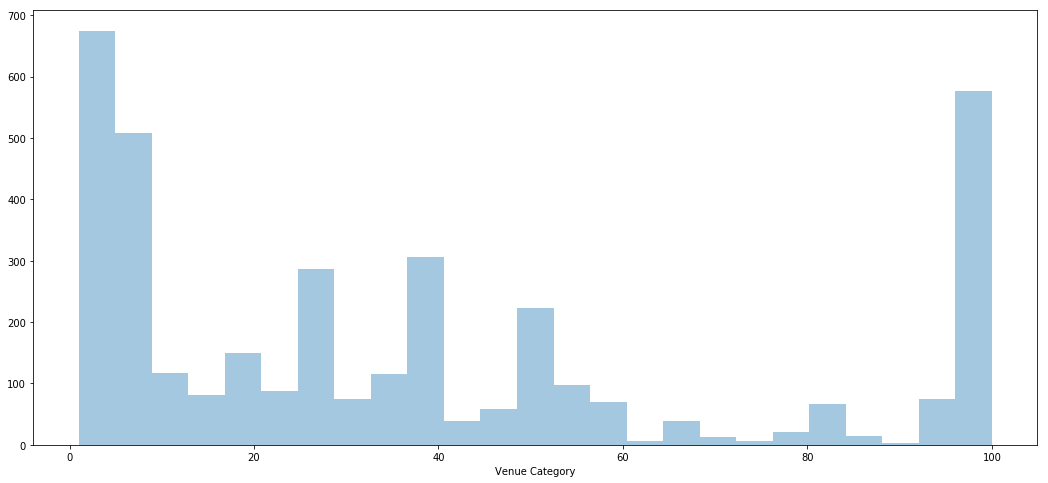

In [53]:
plt.figure(figsize=(18, 8))
sns.distplot(neighborhood_venues_c["Venue Category"], hist=True, bins=25, kde=False)

We see that there are too much neighborhoods that only has less than 10 venues. We estimated that if the number on venues in a neighborhood is less than 10, then, this neighborhood's data is insufficient and will affect negatively on the results. So we filtered out this neighborhoods

Let's check the rate of these negihborhoods in our data.

In [54]:
"{0:.2f} %".format(sum(neighborhood_venues_c["Venue Category"] < 10) / neighborhood_venues_c.shape[0] * 100)

'32.31 %'

Filter out Neighborhoods that has less than 10 venues because those neigborhoods will be noise data sinse the data is insufficient!

In [55]:
neighborhood_venues_c = neighborhood_venues_c[neighborhood_venues_c["Venue Category"] >= 10]

Re-visualize the previous histogram

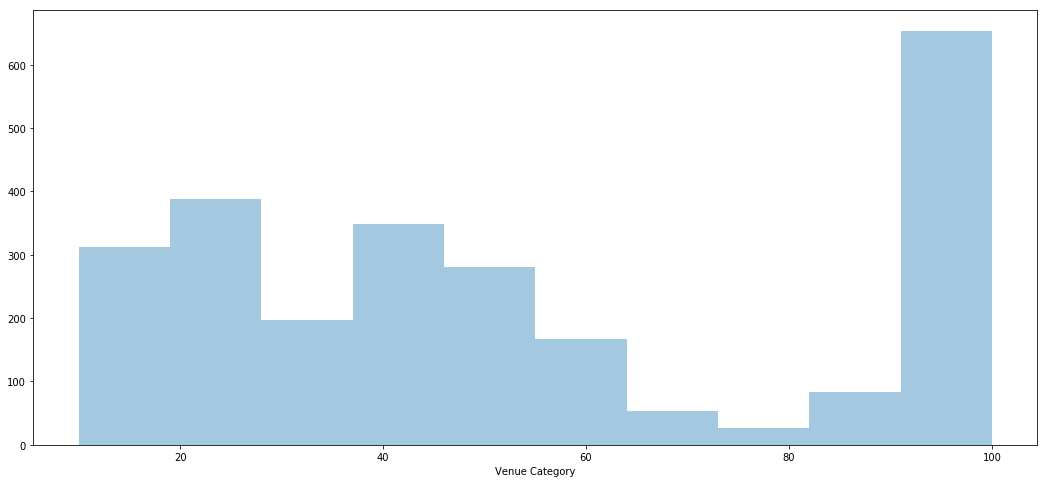

In [56]:
plt.figure(figsize=(18, 8))
sns.distplot(neighborhood_venues_c["Venue Category"], hist=True, bins=10, kde=False)

It is better now!  

Now filter out those neighborhoods from **venues_df**

In [57]:
venues_df = venues_df[venues_df["Neighborhood"].isin(list(neighborhood_venues_c.index))]

In [58]:
venues_df.shape[0]

134844

In [59]:
venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Paris 01 Louvre - 75001,48.8592,2.3417,Place du Louvre,48.859841,2.340822,Plaza
1,Paris 01 Louvre - 75001,48.8592,2.3417,Coffee Crêpes,48.858841,2.340802,Coffee Shop
2,Paris 01 Louvre - 75001,48.8592,2.3417,Église Saint-Germain l'Auxerrois,48.859887,2.340617,Church
3,Paris 01 Louvre - 75001,48.8592,2.3417,Le Fumoir,48.860341,2.340647,Cocktail Bar
4,Paris 01 Louvre - 75001,48.8592,2.3417,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza


## Analysis Each Neighborhoods

See how many unique categories we has in our dataset

In [60]:
venues_df["Venue Category"].unique().shape

(504,)

There are more than 504 different category

Check the top 10 frequent categories

In [62]:
venues_df["Venue Category"].value_counts().head(10)

French Restaurant      10874
Hotel                   7124
Italian Restaurant      6543
Bar                     4517
Pizza Place             3517
Bakery                  3218
Plaza                   3148
Restaurant              3072
Café                    3037
Japanese Restaurant     2759
Name: Venue Category, dtype: int64

**Get Dummies for Venues Categories**

In [65]:
# one hot encoding
venues_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = list(venues_onehot.columns)
fixed_columns.remove("Neighborhood")
fixed_columns.insert(0, "Neighborhood")
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,Alsatian Restaurant,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant,Zoo Exhibit
0,Paris 01 Louvre - 75001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Paris 01 Louvre - 75001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Paris 01 Louvre - 75001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Paris 01 Louvre - 75001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Paris 01 Louvre - 75001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Content-based Recommendation Systems

### Create Genre Dataframe

In [66]:
genre_df = venues_onehot.groupby(["Neighborhood"]).mean()
print(genre_df.shape)
genre_df.head()

(2512, 503)


,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,Alsatian Restaurant,American Restaurant,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant,Zoo Exhibit
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Affori - 20161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Alhambra - 91801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.033333,0.0,0.0,0.033333,0.0,0.0,0.0,0.0
Alhambra - 91802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.013889,0.0,0.0,0.013889,0.0,0.0,0.0,0.0
Alhambra - 91803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Alhambra - 91804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.013889,0.0,0.0,0.013889,0.0,0.0,0.0,0.0


By creating the genre dataframe, the core kernel of our recommender is built.
For any user input we can find the user profile than we can find the recommeded item for this user profile.

That means that, we can extract the tend of the user and suggest results that fits his needs and his preferences.

We implemented an example on the **Results** section.

## Results & Descussion

In this section we will create random user input then we will recommend conclusions to this user.

The user input is the places(Neighborhoods) that he visited before and for each place how many times he has visited this place.

Then we will suggest one place for the user to visit based on user-input and Genre dataframe

#### Create User Input randomly

getUserInput func return a dataframe contains random neighborhoods and the time of visits for each one.

In [67]:
def getUserInput(neighborhoods_num = 5):
    neighborhoods = random.sample(list(genre_df.index), neighborhoods_num)
    userInput = []
    for neighborhood in neighborhoods:
        userInput.append({ 'Neighborhood': neighborhood, 'visits': random.randint(1, 10) })
    return pd.DataFrame(userInput).set_index("Neighborhood")

In [68]:
userInput = getUserInput(5)
userInput

,visits
Neighborhood,
Paris 16 Passy - 75768 CEDEX 16,6
Burbank - 91526,1
Milano - 20136,2
Paris 12 Reuilly - 75574 CEDEX 12,9
Cernusco Sul Naviglio - 20063,5


#### create user profile

In [69]:
userGenre = genre_df.loc[list(userInput.index), :]
userGenre

,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,Alsatian Restaurant,American Restaurant,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Yoshoku Restaurant,Zoo Exhibit
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Paris 16 Passy - 75768 CEDEX 16,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Burbank - 91526,0.0,0.010526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,...,0.0,0.0,0.000000,0.0,0.0,0.010526,0.010526,0.0,0.0,0.0
Milano - 20136,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Paris 12 Reuilly - 75574 CEDEX 12,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.025641,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Cernusco Sul Naviglio - 20063,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [70]:
userProfile = userGenre.transpose().dot(userInput["visits"])

Now We can recommend new place for the user to visit :) .

In [71]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genre_df*userProfile).sum(axis=1))/(userProfile.sum())
recommendedNeighborhood = pd.DataFrame(recommendationTable_df.sort_values(ascending=False).head(1), columns=["Rank"])
recommendedNeighborhood = pd.merge(recommendedNeighborhood, df, left_index=True, right_index=True).iloc[0, :]
recommendedNeighborhood

Rank                0.0537472
Postal Code    75216 CEDEX 16
City                    Paris
Latitude              48.8637
Longitude              2.2769
Name: Paris 16 Passy - 75216 CEDEX 16, dtype: object

#### Show Recommended Neighborhood in Map

In [72]:

map = folium.Map(location=[recommendedNeighborhood.Latitude, recommendedNeighborhood.Longitude], zoom_start=14)

# add markers to map
label = '{}, {}'.format(recommendedNeighborhood.name, recommendedNeighborhood.City)
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [recommendedNeighborhood.Latitude, recommendedNeighborhood.Longitude],
    radius=20,
    popup=label,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.7,
    parse_html=False).add_to(map)  
    
map

## Conclusion 

In this project, We create a content-based recommender system. This recommender system works based on user experiences and a genre matrix that is extracted by using AggData Postal Codes of 15 City from 3 countries, Foursquare API which provide us with the veneues of each neighborhoods of those cities.

We intend to extend the project to cover whole the world by getting more and more data. Also we can improve the project by using hybrid recommender systems to combine the advantages of different types of Recommender Systems.